In [59]:
# reload

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# import  
#%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import numpy as np
import sys
import math
import scipy.stats as stats
#import wandb
from tqdm import tqdm
from functions_dicts_to_parse_data import *
# Increase plot font size from default for all plots instead of setting it in each plot 
plt.rcParams.update({'font.size': 22})

In [61]:
# redirect all print statements to file instead of console

#file_path = 'logs_from_notebook.txt'
#sys.stdout = open(file_path, "w")

In [62]:
#=========================================
# What info / plots do you want displayed
#=========================================
print_logfile_info = True
print_byte_matrix = True
histogram_plots = True
distance_plots = True
timeseries_plots = True; 
# timeseries plots: Which run should I select for timeseries plots (Since it would be too much to plot every UE in every run) 
#ts_plot_run_nums = 'run3'; 
ts_plot_run_idx = 0 # always plot the timeseries for the first run processed
# Which UEs (or IMSIs) should we make time series plots for from the ts_plot_run_nums runs 
ts_plot_IMSIs = [1]
# When using time aggregation to smooth out plots and make them more visually interpretable what window size to use 
time_wind_str = '500ms'
time_wind_val = 500
#===================================
# Data source
#=================================== 
data_dir = '../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/'

# This is a subset of log files that we would like to parse and plot at the moment depending on what is in the data 
files = ran_files+[
                   #'dlThroughput_trace.txt',
                   'rtt_trace.txt', 'delay_trace.txt', 
                   'handover_trace.txt', 'mobility_trace.txt'         
                   #'vrBurst_trace.txt', 'vrFragment_trace.txt',
                   #'dashClient_trace.txt', 'mpegPlayer_trace.txt', # video streaming
                   #'httpServerDelay_trace.txt', 'httpClientDelay_trace.txt', 'httpClientRtt_trace.txt'
                    ]
# Specify here topology details from the dataset we are using 
# This can be infered from the files, but this is easier 
total_num_cells=3
total_num_ues=30
sim_time = 100 # seconds

In [63]:
print('Raw data folder: \n'+data_dir+'\n')
plot_dir = './plots/'+data_dir.split('/')[-2]+'/'
print('Plots saved in folder: \n'+plot_dir+'\n')

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

info_file = open(data_dir+'run1/simulation_info.txt')
for i in range(95):
    print(info_file.readline())
    
sim_start_time = pd.to_datetime(0, unit='s', origin='unix')
sim_end_time = pd.to_datetime(sim_time, unit='s', origin='unix')

Raw data folder: 
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/

Plots saved in folder: 
./plots/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/

Waf: Entering directory `/home/ubuntu/mobile-network-datasets-ns3/ns-3-dev/build'



Scenario Topology Parameters:           

                                        

Macro layer BS positions:               Regular hexaonal lay down

Macro layer num of rings:               0

Macro layer num of BSs:                 0

Micro layer BS antenna pattern:         Cosine 120 degrees

Micro layer of BSs:                     Disabled

Num of UEs:                             0

Number of UEs per BS (per sector):      10

Antenna down tilt angle:                0 deg

3GPP Scenario:                          UMi

  (ISD: 0.5 km, BS height: 10 m, UE height: 1.5 m, UE-BS min dist: 10 m)

                                        

Radio Parameters:                       


In [64]:
# initilize wandb for experiment tracking
#config_dict = {'dataset': data_dir.split('/')[-2], 'window size': time_wind_str, 'log files processed': files,
#              'simulation time': sim_time, 'num of cells': total_num_cells, 'num of UEs':total_num_ues,
#              'run used for timeseriess plots': ts_plot_run_nums, 
#               'IMSIs used for timeseries plots':ts_plot_IMSIs}
##wandb.init(project="mobile-radio-dataset", entity="network-intelligence", config=config_dict)
#print(config_dict)

  0%|                                                                                                                                                                                                                                                      | 0/10 [00:00<?, ?it/s]

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3
Elapsed wall clock: 253s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/DlTxPhyStats.txt
time to read file:  0.02487969398498535
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.506 ,  100.912 )
log runtime: 100.406  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/UlRxPhyStats.txt
time to read file:  0.05892658233642578
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.513 ,  100.909 )
log runtime: 100.396  seconds
--------------------------------------------
UlSinrStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/UlSinrStats.txt
time to read file:  0.0139369964599

 10%|███████████████████████▊                                                                                                                                                                                                                      | 1/10 [00:04<00:37,  4.12s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[236 236  84  84]
 [162 162  83  85]
 [236   0  84  84]
 [147   0  83  83]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6
Elapsed wall clock: 253s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6/DlTxPhyStats.txt
time to read file:  0.02665877342224121
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.504 ,  100.894 )
log runtime: 100.39  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6/UlRxPhyStats.txt
time to read file:  0.053186893463134766
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.528 ,  100.883 )
log runtime: 100.35499999999999  seconds
-------

 20%|███████████████████████████████████████████████▌                                                                                                                                                                                              | 2/10 [00:07<00:28,  3.57s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[246 246  84  84]
 [167 167  83  85]
 [246   0  84  84]
 [160   0  83  83]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8
Elapsed wall clock: 243s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8/DlTxPhyStats.txt
time to read file:  0.022814035415649414
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.519 ,  100.948 )
log runtime: 100.42899999999999  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8/UlRxPhyStats.txt
time to read file:  0.03964638710021973
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.515 ,  100.96 )
log runtime: 100.445  seconds
-------

 30%|███████████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 3/10 [00:10<00:23,  3.32s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[250 250  85  85]
 [196 196  85  85]
 [250   0  85  85]
 [186   0  85  84]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5
Elapsed wall clock: 256s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5/DlTxPhyStats.txt
time to read file:  0.024491548538208008
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.506 ,  100.898 )
log runtime: 100.392  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5/UlRxPhyStats.txt
time to read file:  0.05939936637878418
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.512 ,  100.913 )
log runtime: 100.401  seconds
-----------------

 40%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                              | 4/10 [00:13<00:19,  3.33s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[255 255  83  83]
 [169 169  82  85]
 [255   0  83  83]
 [154   0  82  81]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7
Elapsed wall clock: 259s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7/DlTxPhyStats.txt
time to read file:  0.02455615997314453
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.524 ,  101.035 )
log runtime: 100.511  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7/UlRxPhyStats.txt
time to read file:  0.07094287872314453
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.519 ,  101.049 )
log runtime: 100.53  seconds
-------------------

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                       | 5/10 [00:17<00:16,  3.40s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[244 244  82  82]
 [149 149  80  85]
 [244   0  82  82]
 [138   0  79  79]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10
Elapsed wall clock: 249s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10/DlTxPhyStats.txt
time to read file:  0.025603532791137695
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.515 ,  100.913 )
log runtime: 100.398  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10/UlRxPhyStats.txt
time to read file:  0.05066275596618652
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.537 ,  100.91 )
log runtime: 100.37299999999999  seconds
----

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 6/10 [00:20<00:13,  3.32s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[246 246  84  84]
 [178 178  84  85]
 [246   0  84  84]
 [162   0  84  84]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9
Elapsed wall clock: 250s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9/DlTxPhyStats.txt
time to read file:  0.02445507049560547
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.523 ,  100.904 )
log runtime: 100.381  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9/UlRxPhyStats.txt
time to read file:  0.04932093620300293
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.523 ,  100.901 )
log runtime: 100.378  seconds
------------------

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 7/10 [00:23<00:09,  3.27s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[249 249  84  84]
 [177 177  84  85]
 [249   0  84  84]
 [163   0  84  83]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1
Elapsed wall clock: 246s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1/DlTxPhyStats.txt
time to read file:  0.023779630661010742
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.503 ,  100.9 )
log runtime: 100.397  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1/UlRxPhyStats.txt
time to read file:  0.04413866996765137
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.514 ,  100.91 )
log runtime: 100.396  seconds
--------------------

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 8/10 [00:26<00:06,  3.23s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[252 252  84  84]
 [183 183  83  85]
 [252   0  84  84]
 [171   0  83  83]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4
Elapsed wall clock: 247s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4/DlTxPhyStats.txt
time to read file:  0.02340078353881836
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.513 ,  100.932 )
log runtime: 100.419  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4/UlRxPhyStats.txt
time to read file:  0.044657230377197266
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.512 ,  100.929 )
log runtime: 100.417  seconds
-----------------

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 9/10 [00:29<00:03,  3.21s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[249 249  84  84]
 [186 186  84  85]
 [249   0  84  84]
 [175   0  84  83]]
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2
Elapsed wall clock: 256s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2/DlTxPhyStats.txt
time to read file:  0.025721311569213867
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.507 ,  100.9 )
log runtime: 100.393  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2/UlRxPhyStats.txt
time to read file:  0.0705111026763916
ueIds: min: 1 max: 30 count: 30
log time (start, end): ( 0.529 ,  100.897 )
log runtime: 100.36800000000001  seconds
---------

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.34s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[250 250  84  84]
 [165 165  83  85]
 [250   0  84  84]
 [157   0  83  82]]


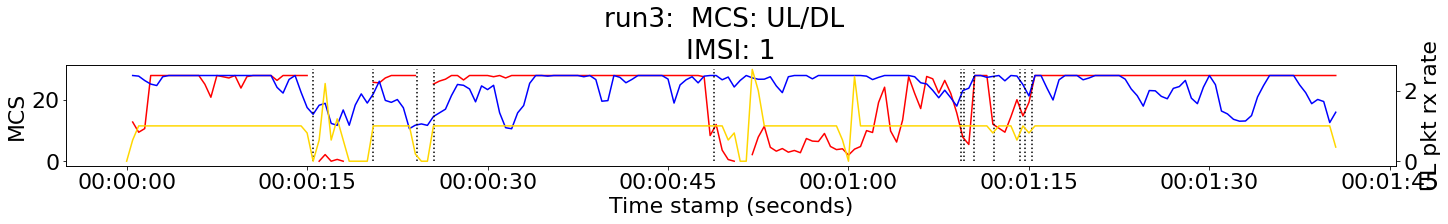

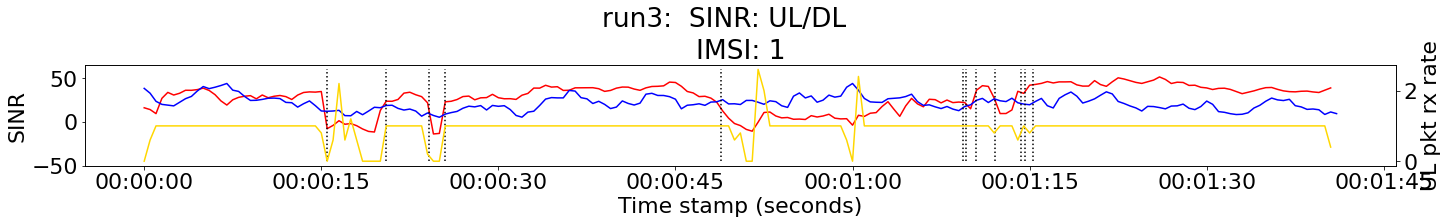

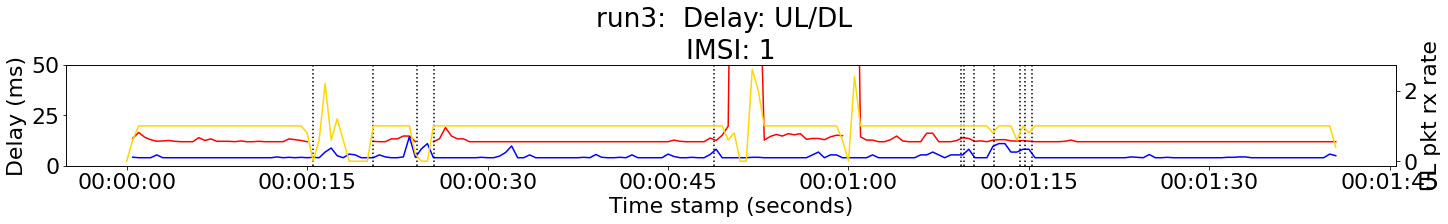

In [65]:
#=======================================
# Initilizing empty lists 
#=======================================
# increment them as we see full runs 
num_runs = 0 
skip_runs = [] #['run3', 'run6', 'run8', 'run7', 'run9', 'run1', 'run4']
# To measure delay probe delivery rate 
# These are values aggregated over all UEs over the símulations time over all runs 
ul_delay_probe_delivery_rate = 0
dl_delay_probe_delivery_rate = 0
rtt_probe_delivery_rate = 0
ul_avg_thput = 0
dl_avg_thput = 0

# Baselines for empty networks
# Aggregate over UEs and runs for histogram plots
# These are arrays with samples aggregated over all UEs over the simulations time over all runs 
# These are not windowed 
ul_delays = np.empty(0)
dl_delays = np.empty(0)
rtt_delays = np.empty(0)

ul_mcs = np.empty(0)
dl_mcs = np.empty(0)
ul_sinr = np.empty(0)
dl_sinr = np.empty(0)
dl_rsrp = np.empty(0)

# Baselines for empty networks
# distance to BS versus metrics, aggregated over windows 
# These are arrays with samples aggregated over all UEs over the simulations time over all runs 
# These are windowed 
w_ul_delays = np.empty(0)
w_dl_delays = np.empty(0)
w_rtt_delays = np.empty(0)
w_ul_sinr = np.empty(0)
w_dl_sinr = np.empty(0)
w_rsrp = np.empty(0)
w_dist_to_cell = np.empty(0)
w_avg_ue_xpos = np.empty(0)
w_avg_ue_ypos = np.empty(0)
w_mode_assoc_cell = np.empty(0)

w_ul_mcs = np.empty(0)
w_dl_mcs = np.empty(0)

ul_pkt_rx = np.empty(0)
dl_pkt_rx = np.empty(0)
rtt_pkt_rx = np.empty(0)

cell_ul_thput = np.empty(0)
cell_dl_thput = np.empty(0)

ul_thput = np.empty(0)
dl_thput = np.empty(0)

# mi here is multi-indexed, with time and IMSi as the 2 levels of indices 
mi_ul_delays = pd.DataFrame()
mi_dl_delays = np.empty(0)
mi_rtt_delays = np.empty(0)
mi_ul_sinr = np.empty(0)
mi_dl_sinr = np.empty(0)
mi_rsrp = np.empty(0)
mi_dist_to_cell = np.empty(0)



# app specific observations for plotting
# aggregated over all UEs running this app to plot histograms 
page_load_time = np.empty(0) # page load time over all webpages viewed 
webpage_size = np.empty(0) # size of the webpage 
segment_bitrate = np.empty(0) # bitrate of segment requested over all videos watched
vr_burst_time = np.empty(0) # time to receive a full burst in VR 

# handover related initializers
hos_per_cell_per_time = 0
time_bw_hos = np.empty(0) # seconds 

# constant multipliers
M = (10**6)
K = (10**3)





#=======================================
# Iterate over runs and files 
#=======================================

run_idx=0
#=================================================================
#for run in os.listdir(data_dir):
#for run in tqdm(glob.glob(data_dir+'run3')):
for run in tqdm(glob.glob(data_dir+'run*')):
#=================================================================
    dict_gnb_pos = pd.read_csv(data_dir+'run1/gnb_locations.txt', sep=',').set_index('cellId').to_dict('index')
    dict_gnb_pos[0] = {'gnbpos_x': np.nan, 'gnbpos_y': np.nan, 'gnbpos_z': np.nan}
    
    vr_imsi=np.empty(0)
    dash_imsi=np.empty(0)
    http_imsi=np.empty(0)

    print('============================================================')
    print (run)
    print('============================================================')
    only_run = run.split('/')[-1]
    #if only_run in skip_runs:
    #    continue
    
    # check if run ran to completion
    with open(run+'/simulation_info.txt', "r") as sim_info_file:
        last_line = sim_info_file.readlines()[-1]
        print(last_line)
        if 'Elapsed wall clock' not in last_line:
            print('This run did not finish to completion, skipping it')
            skip_runs.append(only_run)
            print(skip_runs)
            continue
            
    # To store and compare the number of bytes sent and received in different RAN layers 
    bytes_matrix = np.zeros((4, 4), dtype=int)
    # time series plots for a chosen run
    if ts_plot_run_idx == run_idx:
    #if True:    
        # Aggregate plots from different files into one figure since we iterate over files
        # subplots for the chosen IMSI values for the one chosen run 
        # ul mcs, dl mcs figure
        if 'UlMacStats.txt'in files and 'DlMacStats.txt' in files:
            fig_mcs, axs_mcs = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_mcs.suptitle(only_run+':  MCS: UL/DL')
        if 'DlRsrpSinrStats.txt' in files and 'UlSinrStats.txt' in files: 
            # ul sinr and dl sinr
            fig_sinr, axs_sinr = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_sinr.suptitle(only_run+':  SINR: UL/DL')
        if 'delay_trace.txt' in files:
            # ul delay, dl delay, rtt figure 
            fig_delay, axs_delay = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_delay.suptitle(only_run+':  Delay: UL/DL')
        
        
    
#=================================================================
    for file in files:
#=================================================================
        print('--------------------------------------------')
        print(file)
        start_time = time.time()
        
        #=======================================
        # Preprocess logs 
        #=======================================
        
        ## Read file while fixing the tab issue
        if file in files_with_trailing_tab:
            #df = pd.read_csv(data_dir+run+'/'+file, sep='\t', usecols=range(0,18))
            df = pd.read_csv(run+'/'+file, sep='\t', usecols=range(0,18))
            print(run+'/'+file)
        else:
            #df = pd.read_csv(data_dir+run+'/'+file, sep='\t')
            df = pd.read_csv(run+'/'+file, sep='\t')
            print(run+'/'+file)
        
        print('time to read file: ', (time.time() - start_time))
        
        
        ## Do some file specific preprocessing
        ## Make uniform the timestamp units convert them all to micro seconds 
        if '% time' in df.columns:
            df.rename(columns = {'% time':'tstamp_us'}, inplace = True)
            if file_name_to_tstamp_unit[file] == 'ms':
                df['tstamp_us'] = df['tstamp_us']*K
            elif file_name_to_tstamp_unit[file] == 's':
                df['tstamp_us'] = df['tstamp_us']*M
        ## Make uniform the timestamp units        
        if '% start' in df.columns:
            ## TO DO: check if this is actually micro seconds. I think it is seconds   
            df.rename(columns = {'% start':'tstamp_us'}, inplace = True)
            df.rename(columns = {'end':'end_timeslot_us'}, inplace = True)
            df['tstamp_us'] = df['tstamp_us']*M
            df['end_timeslot_us'] = df['end_timeslot_us']*M
        ## Some internally generated logs use the naming 'CellId' replace that with 'cellId'
        if ('CellId' in df.columns):
            df.rename(columns = {'CellId':'cellId'}, inplace = True)
        if ('currentCellId' in df.columns):
            df.rename(columns = {'currentCellId':'cellId'}, inplace = True)    
        
        # Warning: cellId and IMSI here are IP addresses, but it should not matter since 
        # there will only be 1 UE doing these ul and dl throughput scans   
        if file == 'dlThroughput_trace.txt':
            df.rename(columns = {'toAddr':'IMSI', 'fromAddr': 'cellId'}, inplace = True)
            assert (df['IMSI'].nunique() == 1), "More than one throughput measurement UE is in the logs" 
        if file == 'ulThroughput_trace.txt':
            df.rename(columns = {'toAddr':'cellId', 'fromAddr': 'IMSI'}, inplace = True)
            assert (df['IMSI'].nunique() == 1), "More than one throughput measurement UE is in the logs" 
            
        ## Just for plotting change the timestamp_us to seconds and delay values to milli seconds 
        ## since I am mostly plotting directly from pandas and don't know how to add a multiplicative factor to a column    
        if 'tstamp_us' in df.columns:
            df['tstamp_us'] = df['tstamp_us']/M
            # Set datetime index for all files so that we can do series operations 
            datatime_timestamps = pd.to_datetime(df['tstamp_us'], unit='s', origin='unix')
            df = df.set_index(datatime_timestamps, inplace=False)
            
            if file in a_vs_b_files: 
                # add a sample at the beginning and ending of every timeseries at sim_start_time and sim_end_time. 
                # This way the timeseries after resampling are all of the same length 
                alignment_sample = np.empty(df.shape[1])
                alignment_sample[:] = np.nan
                start_sample = pd.DataFrame([alignment_sample], columns=df.columns, index=[sim_start_time])
                end_sample = pd.DataFrame([alignment_sample], columns=df.columns, index=[sim_end_time])
                if 'dir' in df.columns:
                    for imsi in range(1,total_num_ues+1):
                        for di in ['UL', 'DL']:
                            start_sample['IMSI'] = imsi
                            start_sample['dir'] = di
                            end_sample['IMSI'] = imsi
                            end_sample['dir'] = di
                            df = pd.concat([start_sample, df, end_sample])
                elif 'cellId' in df.columns:
                    for imsi in range(1,total_num_ues+1):
                        start_sample['IMSI'] = imsi
                        start_sample['cellId'] = 0
                        end_sample['IMSI'] = imsi
                        end_sample['cellId'] = 0
                        df = pd.concat([start_sample, df, end_sample])
                else:
                    for imsi in range(1,total_num_ues+1):
                        start_sample['IMSI'] = imsi
                        end_sample['IMSI'] = imsi
                        df = pd.concat([start_sample, df, end_sample])
        
        if file == 'dlThroughput_trace.txt' or file == 'ulThroughput_trace.txt':
            df['IMSI'] = 1
            thput_meas_imsi = 1
        
        # converting all delay values to ms instead of us
        if 'delay' in df.columns:
            df['delay'] = df['delay']/K
        
        #=======================================
        # Print log file info  
        #=======================================
        if print_logfile_info:
            ## Display info about the UEs who have made entries in this file to make sure that all the UEs who should be here are here. 
            print('ueIds: min:', min(df['IMSI'].value_counts().index), 'max:', max(df['IMSI'].value_counts().index),
                 'count:', len(df['IMSI'].value_counts().index))
            if (file in ran_files) and (len(df['IMSI'].value_counts().index) < total_num_ues):
                print('WARNING: Fewer UEs in this file than the total number in the simulation')
                print(df['IMSI'].value_counts())

            ## Display info about the Cells who have made entries in this file
            #print('cellIds: min:', min(df['cellId'].value_counts().index), 'max:', max(df['cellId'].value_counts().index),
            #     'count:', len(df['cellId'].value_counts().index))

            ## Total runtime of log
            print('log time (start, end): (', np.nanmin(df['tstamp_us']), ', ' ,np.nanmax(df['tstamp_us']), ')')
            print('log runtime:', (np.nanmax(df['tstamp_us']) - np.nanmin(df['tstamp_us'])), ' seconds')
        
        
        #=======================================
        # Byte matrix: Aggregate bytes over runs  
        #=======================================
        
        ## Gather the number of bytes sent from/to all UEs in each layer and direction to compare
        if file == 'DlTxPhyStats.txt':
            bytes_matrix[0,0] = df['size'].sum()/M
        elif file == 'DlRxPhyStats.txt':
            bytes_matrix[2,0] = df['size'].sum()/M
        elif file == 'UlTxPhyStats.txt':
            bytes_matrix[1,0] = df['size'].sum()/M
        elif file == 'UlRxPhyStats.txt':
            bytes_matrix[3,0] = df['size'].sum()/M
        elif file == 'DlMacStats.txt':
            bytes_matrix[0,1] = (df['sizeTb1'].sum() + df['sizeTb2'].sum())/M
        elif file == 'UlMacStats.txt':
            bytes_matrix[1,1] = df['size'].sum()/M
        elif file == 'DlRlcStats.txt':
            bytes_matrix[0,2] = df['TxBytes'].sum()/M
            bytes_matrix[2,2] = df['RxBytes'].sum()/M
        elif file == 'UlRlcStats.txt':
            bytes_matrix[1,2] = df['TxBytes'].sum()/M
            bytes_matrix[3,2] = df['RxBytes'].sum()/M
        elif file == 'DlPdcpStats.txt':
            bytes_matrix[0,3] = df['TxBytes'].sum()/M
            bytes_matrix[2,3] = df['RxBytes'].sum()/M
        elif file == 'UlPdcpStats.txt':
            bytes_matrix[1,3] = df['TxBytes'].sum()/M
            bytes_matrix[3,3] = df['RxBytes'].sum()/M

        
        #======================================================
        # File specific extraction and aggregation of metrics  
        #======================================================
        
        if file == 'UlMacStats.txt':
            cell_ul_thput = np.append(cell_ul_thput, df.groupby(by=['cellId'])['size'].resample(time_wind_str).sum()/M) # MB in each time window 
            ul_mcs = np.append(ul_mcs, df['mcs'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_mcs = np.append(w_ul_mcs, df_parsed['mcs'])
        
        if file == 'DlMacStats.txt':
            cell_dl_thput = np.append(cell_dl_thput, df.groupby(by=['cellId'])['sizeTb1'].resample(time_wind_str).sum()/M) # MB
            dl_mcs = np.append(dl_mcs, df['mcsTb1'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_dl_mcs = np.append(w_dl_mcs, df_parsed['mcsTb1'])
        
        if file == 'DlRsrpSinrStats.txt':
            #grouping results in a mutli-indexed dataframe 
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            dl_sinr = np.append(dl_sinr, df['sinr'])
            w_dl_sinr = np.append(w_dl_sinr, df_parsed['sinr'])
            dl_rsrp = np.append(dl_rsrp, df['rsrp'])
            w_rsrp = np.append(w_rsrp, df_parsed['rsrp'])
          
        if file == 'UlSinrStats.txt':
            # note that the UL sinr is linear while the dl sinr is in dB (I think ... )
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_sinr = np.append(w_ul_sinr, df_parsed['sinrLinear'])
            ul_sinr = np.append(ul_sinr, df_parsed['sinrLinear'])
            
        if file == 'delay_trace.txt':
            # separate UL and DL 
            ul_probes = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI']).size()
            dl_probes = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI']).size()
            #if ts_plot_run_nums in run:
            #if True:    
                # group by UE
                #print('UL # delay probe delivery rate per UE: ', ul_probes/(sim_time*10))
                #print('DL # delay probes delivery rate per UE: ', dl_probes/(sim_time*10))
            print('UL delay pkt rx rate for this run over all UEs: ', ul_probes.sum()/(sim_time*10*total_num_ues)) 
            print('DL delay pkt rx rate for this run over all UEs: ', dl_probes.sum()/(sim_time*10*total_num_ues))
            ul_delay_probe_delivery_rate = ul_delay_probe_delivery_rate + ul_probes.sum()
            dl_delay_probe_delivery_rate = dl_delay_probe_delivery_rate + dl_probes.sum()
            # for histogram
            ul_delays = np.append(ul_delays, df.groupby(by=['dir']).get_group('UL')['delay'])
            dl_delays = np.append(dl_delays, df.groupby(by=['dir']).get_group('DL')['delay'])
            
            # need to organize by UE IMSI
            df_ul_parsed = df.groupby(by=['dir']).get_group('UL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')  
            df_dl_parsed = df.groupby(by=['dir']).get_group('DL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_delays = np.append(w_ul_delays, df_ul_parsed['delay'])
            w_dl_delays = np.append(w_dl_delays, df_dl_parsed['delay'])
            
            df_ul_pkt_rx_parsed = df.groupby(by=['dir']).get_group('UL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).count().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')  
            df_dl_pkt_rx_parsed = df.groupby(by=['dir']).get_group('DL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).count().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')         
            ul_pkt_rx = np.append(ul_pkt_rx, df_ul_pkt_rx_parsed['delay']/(time_wind_val/100))# assuming the 100ms probing interval 
            dl_pkt_rx = np.append(dl_pkt_rx, df_dl_pkt_rx_parsed['delay']/(time_wind_val/100))# assuming the 100ms probing interval 
            
        if file == 'rtt_trace.txt':
            rtt_probes = df.groupby(by=['IMSI']).size()
            # group by UE
            #print('# RTT probes per UE: ', rtt_probes/(sim_time*10))
            #print('Sum of RTT probes for all UEs: ', rtt_probes.sum())
            rtt_probe_delivery_rate = rtt_probe_delivery_rate + rtt_probes.sum()
            # for histogram
            rtt_delays = np.append(rtt_delays, df['delay'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_rtt_delays = np.append(w_rtt_delays, df_parsed['delay'])
            
        if file == 'ulThroughput_trace.txt':
            ul_avg_thput = ul_avg_thput + (df['pktSize'].sum()/M) # MB
            # even the mobility log should only have one UE or we wont know which one to match with this log for distance versus metric graphs
            df_parsed = df.resample(time_wind_str).sum()*8/(time_wind_val*K)
            df_parsed = df_parsed[sim_start_time : sim_end_time]# Mbps
            ul_thput = np.append(ul_thput, df_parsed['pktSize'])# Mbps
            
        if file == 'dlThroughput_trace.txt':
            dl_avg_thput = dl_avg_thput + (df['pktSize'].sum()/M) # MB
            # even the mobility log should only have one UE or we wont know which one to match with this log for distance versus metric graphs
            df_parsed = df.resample(time_wind_str).sum()*8/(time_wind_val*K)
            df_parsed = df_parsed[sim_start_time : sim_end_time]# Mbps
            dl_thput = np.append(dl_thput, df_parsed['pktSize'])# Mbps   
        
        if file == 'handover_trace.txt':
            hos_per_cell_per_time = hos_per_cell_per_time + df.shape[0]
            time_bw_hos = np.append(time_bw_hos, df.groupby(by=['IMSI'])['tstamp_us'].diff().dropna()) 
        
        if file == 'mobility_trace.txt':
            # add a distance column which is the distance from the UE to the cell it is connected to
            gnb_pos = [dict_gnb_pos[cellId] for cellId in df['cellId'].to_numpy()]
            ue_pos = df[['pos_x', 'pos_y']].to_numpy()
            distance = [math.dist([gnb_loc['gnbpos_x'],gnb_loc['gnbpos_y']], ue_loc) for gnb_loc,ue_loc in zip(gnb_pos,ue_pos)]          
            # gnb_pos is a list of dictionaries as well with keys {'gnbpos_x': 1, 'gnbpos_y': 0.5, 'gnbpos_z' : 0.5}
            # so it is a list of dictionaries 
            # Does it have 0 IMSI values ? if so then I need to remove it  
            # add distance as a column 
            df['dist_to_cell'] = distance
            #if ('ulThroughput_trace.txt' in files) or ('dlThroughput_trace.txt' in files):
            #    df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).get_group(thput_meas_imsi).resample(time_wind_str).mean().loc[sim_start_time : sim_end_time]
            #else:
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            
            w_dist_to_cell = np.append(w_dist_to_cell, df_parsed['dist_to_cell'])
            w_avg_ue_xpos = np.append(w_avg_ue_xpos, df_parsed['pos_x'])
            w_avg_ue_ypos = np.append(w_avg_ue_ypos, df_parsed['pos_y'])
            
            df_parsed2 = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str)['cellId'].apply({'cellId':lambda x: stats.mode(x, keepdims=True)[0]}).loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_mode_assoc_cell = np.append(w_mode_assoc_cell, df_parsed2['cellId'])
            
        if file == 'httpClientRtt_trace.txt':
            # http web page objects 
            http_imsi = df['IMSI'].unique()
            # choosing 2 UEs who have http app installed to show in the timeseries plot
            plot_http_imsi=http_imsi[0:2]
            # get page load time 
            # grouped by IMSI, by web page id 
            # doubt this will work but I need to see if there is a way to do this without a nested for loop
            #page_load_time = np.append( page_load_time, df.groupby(by=['IMSI']).groupby(by=['webpageId'])['delay'].sum() )
            #webpage_size = np.append( webpage_size, df.groupby(by=['IMSI']).groupby(by=['webpageId'])['objectSize'].sum() )
            for name1, group1 in df.groupby(by=['IMSI']):
                for name2, group2 in group1.groupby(by=['webpageId']):
                    page_load_time = np.append(page_load_time, group2['delay'].sum())
                    webpage_size = np.append(webpage_size, group2['objectSize'].sum())
                
        if file == 'vrFragment_trace.txt':
            # time to send a VR burst of pictures
            vr_imsi = df['IMSI'].unique()
            plot_vr_imsi = vr_imsi[0:2]
            for name1, group1 in df.groupby(by=['IMSI']):
                for name2, group2 in group1.groupby(by=['burstSeqNum']):
                    this_run_vr_burst_time = group2['delay'].sum()
                    vr_idx = group2['delay'].index
                    vr_burst_time = np.append(vr_burst_time, this_run_vr_burst_time)
        
        if file == 'dashClient_trace.txt':
            # video segment bitrates 
            dash_imsi = df['IMSI'].unique()
            # choosing 2 UEs who have dash app installed to show in the timeseries plot
            plot_dash_imsi = dash_imsi[0:2]
            segment_bitrate = np.append(segment_bitrate, df['newBitRate_bps'])
        
        #if file == 'flow_trace.txt':
        #    # separate UL and DL 
        #    ul_brate = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI'])['pktSize'].sum()/(M) # MB
        #    ul_brate = ul_brate*8/(df['tstamp_us'].iloc[-1] - df['tstamp_us'].iloc[0]) 
        #    dl_brate = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI'])['pktSize'].sum()/(M) # MB
        #    dl_brate = dl_brate*8/(df['tstamp_us'].iloc[-1] - df['tstamp_us'].iloc[0]) 
        #    # group by UE
        #    print('UL brate Mbps per UE: ', ul_brate)
        #    print('DL brate Mbps per UE: ', dl_brate)
        #    #print('UL Giga Bytes sent by each UE over the duration of the simulation: ', ul_bytes_sent)
        #    #print('DL Giga Bytes sent by each UE over the duration of the simulation: ', dl_bytes_sent)
        
        #=======================================
        # Plot timeseries   
        #=======================================
        
        if (timeseries_plots and (ts_plot_run_idx == run_idx) ):    
        #if (timeseries_plots and (True) ):        
            # To see samples of various metrics in cmparison with each other as they change                
            ## RAN plots (UL mcs overlayed on DL mcs) for samples UEs in a sample run 
            if file == 'DlMacStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['mcsTb1'].resample(time_wind_str).mean()
                    axs_mcs[ix,0].plot(val.index, val, color='b')
                    axs_mcs[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_mcs[ix,0].set_ylabel('MCS')
                    axs_mcs[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'UlMacStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['mcs'].resample(time_wind_str).mean()
                    axs_mcs[ix,0].plot(val.index, val, color='r')
            elif file == 'DlRsrpSinrStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['sinr'].resample(time_wind_str).mean()
                    axs_sinr[ix,0].plot(val.index, 10*np.log10(val), color='b')
                    axs_sinr[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_sinr[ix,0].set_ylabel('SINR')
                    #axs_sinr[ix].set_ylim(-45,100) (-45,65)
                    axs_sinr[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'UlSinrStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['sinrLinear'].resample(time_wind_str).mean()
                    axs_sinr[ix,0].plot(val.index, 10*np.log10(val), color='r')
                    #axs_sinr[ix].set_ylim(-45,150)
            ## Delay plots (UL delay, DL delay and RTT overlayed) 
            elif file == 'delay_trace.txt':
                df_ul = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI'])
                df_dl = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI'])
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df_ul.get_group(ue)['delay'].resample(time_wind_str).mean()
                    axs_delay[ix,0].plot(val.index, val, color='r')
                    axs_delay[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_delay[ix,0].set_ylabel('Delay (ms)')
                    axs_delay[ix,0].set_ylim(0,50)
                    axs_delay[ix,0].set_title('IMSI: '+str(ue))
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df_dl.get_group(ue)['delay'].resample(time_wind_str).mean()
                    axs_delay[ix,0].plot(val.index, val, color='b')
                    axs_delay[ix,0].set_ylim(0,50)
                    
                    val2 = df_ul.get_group(ue)['delay'].resample(time_wind_str).count()/(time_wind_val/100)
                    ax2 = axs_delay[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
                    #val2 = df_dl.get_group(ue)['delay'].resample(time_wind_str).count()/(time_wind_val/100)
                    #ax2.plot(val2.index, val2, color='g')
                    ax2 = axs_mcs[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
                    ax2 = axs_sinr[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
            #elif file == 'rtt_trace.txt':
            #    print(df['IMSI'].value_counts())
            #    for ix, ue in enumerate(ts_plot_IMSIs):
            #        val = df.groupby(by=['IMSI']).get_group(ue)['delay']
            #        print(ix)
            #        axs_delay[ix].plot(val.index, val, color='magenta')
            #        axs_delay[ix].set_ylim(0,500)
            ## Browsing: Time between object request and object download (confirm this from the ns3 model)
            elif file == 'handover_trace.txt':      
                    #overlay handover shifts on delay timeseries
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df.groupby(by=['IMSI']).get_group(ue)['cellId']
                    axs_delay[ix,0].stem(val.index, np.ones(val.shape[0])*1000, linefmt='k:', basefmt=" ", markerfmt=' ')
                    axs_mcs[ix,0].stem(val.index, np.ones(val.shape[0])*30, linefmt='k:', basefmt=" ", markerfmt=' ') 
                    axs_sinr[ix,0].stem(val.index, np.ones(val.shape[0])*60, linefmt='k:', bottom=-45, basefmt=" ", markerfmt=' ') 
            elif file == 'httpClientRtt_trace.txt':
                fig_http, axs_http = plt.subplots(len(plot_http_imsi),1,figsize=(20,(len(plot_http_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_http.suptitle(only_run+':  Time to fetch http web browser object (ms)')
                for ix, ue in enumerate(plot_http_imsi):
                    val = df.groupby(by=['IMSI']).get_group(ue)['delay']
                    axs_http[ix,0].stem(val.index, val, linefmt='g-')
                    axs_http[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_http[ix,0].set_ylabel('http object RTT (ms)')
                    axs_http[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'dashClient_trace.txt':
                fig_bitrate, axs_bitrate = plt.subplots(len(plot_dash_imsi),1,figsize=(20,(len(plot_dash_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_bitrate.suptitle(only_run+':  Video segment bitrate')
                for ix, ue in enumerate(plot_dash_imsi):
                    val = df.groupby(by=['IMSI']).get_group(ue)['newBitRate_bps']
                    axs_bitrate[ix,0].stem(val.index, val, linefmt='g-')
                    axs_bitrate[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_bitrate[ix,0].set_ylabel('Video bitrate')
                    axs_bitrate[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'ulThroughput_trace.txt':
                val = df_parsed['pktSize'] # assuming it was parsed before 
                fig_ulThput = plt.figure(figsize=(20,3))
                fname=plot_dir+'ts_ul_throughput.png'
                plt.plot(val.index, val, color='r')
                plt.xlabel('Time stamp (seconds)')
                plt.ylabel('UL Throughput (Mbps)')
                plt.savefig(fname)
                fig_ulThput.show()
                #wandb.log({"UL Throughput (Mbps)": wandb.Image(fname)})
            elif file == 'dlThroughput_trace.txt':
                val = df_parsed['pktSize'] # assuming it was parsed before 
                fig_dlThput = plt.figure(figsize=(20,3))
                plt.plot(val.index, val, color='b')
                plt.xlabel('Time stamp (seconds)')
                plt.ylabel('DL Throughput (Mbps)')
                plt.savefig(plot_dir+'ts_dl_throughput.png')
                fig_dlThput.show()
                #wandb.log({"DL Throughput (Mbps)": plt})
            elif file == 'vrFragment_trace.txt':
                fig_vr, axs_vr = plt.subplots(len(plot_vr_imsi),1,figsize=(20,(len(plot_vr_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_vr.suptitle(only_run+':  VR time to send packet burst (ms)')
                for ix, ue in enumerate(plot_vr_imsi):
                    group1 = df.groupby(by=['IMSI']).get_group(ue)
                    val = group1.groupby(by=['burstSeqNum'])['delay'].sum()
                    #for name2, group2 in group1.groupby(by=['burstSeqNum']):
                    #    val = group2['delay'].sum()
                    #    #vr_idx = group2['delay'].index
                    axs_vr[ix,0].plot(val.index, val, color='b')
                    axs_vr[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_vr[ix,0].set_ylabel('Delay (ms)')
                    axs_vr[ix,0].set_title('IMSI: '+str(ue))
        # end of timeseries_plots
    # end of for over files 
    if ts_plot_run_idx == run_idx:
    #if True:    
        # save plots and send to wandb
        if 'DlRsrpSinrStats.txt' and 'UlSinrStats.txt': 
            fname=plot_dir+'timeseries_sinr.png'
            fig_sinr.savefig(fname)
            fig_sinr.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of UL/DL SINR": wandb.Image(fname)})
        if 'UlMacStats.txt' and 'DlMacStats.txt':
            fname=plot_dir+'timeseries_mcs.png'
            fig_mcs.savefig(fname)
            fig_mcs.show()
            #wandb.log({"timeseries of UL/DL MCS": wandb.Image(fname)})
        if 'delay_trace.txt':
            fname=plot_dir+'timeseries_delay.png'
            fig_delay.savefig(fname)
            fig_delay.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of UL/DL delay (ms)": wandb.Image(fname)})
        if 'httpClientRtt_trace.txt' in files:
            fname=plot_dir+'timeseries_http_delay.png'
            fig_http.savefig(fname)
            fig_http.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of Time to receive http object (ms)": wandb.Image(fname)})
        if 'dashClient_trace.txt' in files:
            fname=plot_dir+'timeseries_dash_bitrate.png'
            fig_bitrate.savefig(fname)
            fig_bitrate.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of Video segment bitrate": wandb.Image(fname)})  
        if 'vrFragment_trace.txt' in files:
            fname=plot_dir+'timeseries_vr_pktBurstTime.png'
            fig_vr.savefig(fname)
            fig_vr.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of VR bursttime": wandb.Image(fname)})      
        
    #=======================================
    # Print per run byte matrix in MB   
    #=======================================
    if print_byte_matrix:
        print ('Byte Matrix in MB')
        print('  X  phy mac rlc pdcp\n' + \
              'dlTx  x   x   x   x\n' + \
              'ulTx  x   x   x   x\n' + \
              'dlRx  x   x   x   x\n' + \
              'ulRx  x   x   x   x')
        print(bytes_matrix)

    num_runs=num_runs+1
    run_idx=run_idx+1
# end of for over runs

print('============================================================')
# some post processing 
if 'UlMacStats.txt' in files:
    cell_ul_thput = cell_ul_thput*8/(time_wind_val/K)#Mbps
if 'DlMacStats.txt' in files:
    cell_dl_thput = cell_dl_thput*8/(time_wind_val/K)#Mbps

In [67]:
#=======================================
# Print summary statistics   
#=======================================  
if 'delay_trace.txt' in files: 
    print('--------------------------------------------')
    print("UL delay probe delivery rate: ", ul_delay_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print("DL delay probe delivery rate: ", dl_delay_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print('--------------------------------------------')
    print("Summary stats: ul_delays")
    print(pd.Series(ul_delays).describe())
    print('0.95 quantile: ', np.nanquantile(ul_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(ul_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(ul_delays,0.99))
    print('--------------------------------------------')
    print("Summary stats: dl_delays")
    print(pd.Series(dl_delays).describe())
    print('0.95 quantile: ', np.nanquantile(dl_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(dl_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(dl_delays,0.99))
if 'rtt_trace.txt' in files:
    print('--------------------------------------------')
    print("RTT probe delivery rate: ", rtt_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print('--------------------------------------------')
    print("Summary stats: rtt_delays")
    print(pd.Series(rtt_delays).describe())
    print('0.95 quantile: ', np.nanquantile(rtt_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(rtt_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(rtt_delays,0.99))
    
if 'ulThroughput_trace.txt' in files:
    print('--------------------------------------------')
    print("UL survey average thoughput (Mbps): ", ul_avg_thput*8/(sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: ul_thput (Mbps)")
    print(pd.Series(ul_thput).describe())
    print('0.95 quantile: ', np.nanquantile(ul_thput,0.95))
    print('0.97 quantile: ', np.nanquantile(ul_thput,0.97))
    print('0.99 quantile: ', np.nanquantile(ul_thput,0.99))
if 'dlThroughput_trace.txt' in files:
    print('--------------------------------------------')
    print("DL survey average thoughput (Mbps): ", dl_avg_thput*8/(sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: dl_thput (Mbps)")
    print(pd.Series(dl_thput).describe())
    print('0.95 quantile: ', np.nanquantile(dl_thput,0.95))
    print('0.97 quantile: ', np.nanquantile(dl_thput,0.97))
    print('0.99 quantile: ', np.nanquantile(dl_thput,0.99))
if 'handover_trace.txt' in files:
    print('--------------------------------------------')
    print('Number of handover per cell every 100 s: ', hos_per_cell_per_time*100/(total_num_cells*sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: time bw handovers (seconds)")
    print(pd.Series(time_bw_hos).describe())
    print('0.95 quantile: ', np.nanquantile(time_bw_hos,0.95))   

--------------------------------------------
UL delay probe delivery rate:  0.96889
DL delay probe delivery rate:  1.0013
--------------------------------------------
Summary stats: ul_delays
count    290067.000000
mean         99.651478
std         976.143546
min           4.931000
25%          11.931000
50%          11.932000
75%          13.931000
max       46716.932000
dtype: float64
0.95 quantile:  25.933
0.97 quantile:  93.93302000000003
0.99 quantile:  2172.93168
--------------------------------------------
Summary stats: dl_delays
count    299790.000000
mean          5.470247
std          43.278621
min           3.999000
25%           3.999000
50%           3.999000
75%           3.999000
max        4142.999000
dtype: float64
0.95 quantile:  10.999
0.97 quantile:  10.999
0.99 quantile:  11.999
--------------------------------------------
RTT probe delivery rate:  0.96787
--------------------------------------------
Summary stats: rtt_delays
count    289761.000000
mean        10

60300
60300
60300
60300
60300
60300
60300
60300
60300
60300
60300


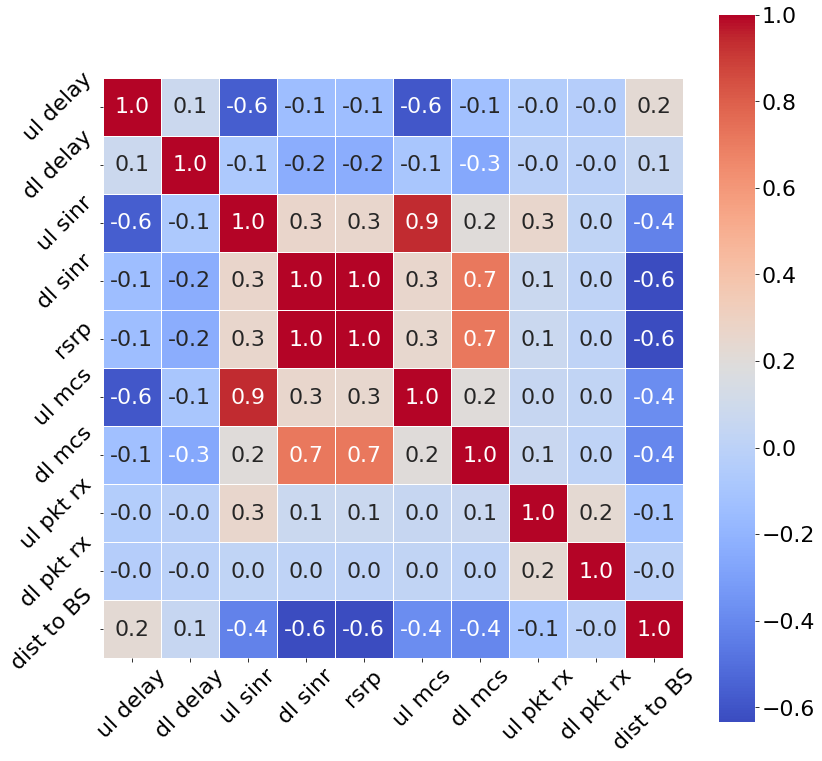

In [68]:
# plot a heatmap 
# The metrics to put in the heatmap 

print(len(w_ul_delays))
print(len(w_dl_delays))
#print(len(w_rtt_delays))
print(len(w_ul_sinr))
print(len(w_dl_sinr))
print(len(w_rsrp))
print(len(w_ul_mcs))
print(len(w_dl_mcs))
print(len(ul_pkt_rx))
print(len(dl_pkt_rx))
#print(len(rtt_pkt_rx))
#print(len(cell_ul_thput))
#print(len(cell_dl_thput))
print(len(w_dist_to_cell))
print(len(w_mode_assoc_cell))
#print(len(ul_thput))
#print(len(dl_thput))


windowed_combined_data = pd.DataFrame({'ul delay': w_ul_delays, 
                            'dl delay':w_dl_delays,
                            #'rtt delay':w_rtt_delays,
                            'ul sinr':w_ul_sinr,
                            'dl sinr':w_dl_sinr, 
                            'rsrp':w_rsrp,
                            'ul mcs':w_ul_mcs,
                            'dl mcs':w_dl_mcs,
                            'ul pkt rx':ul_pkt_rx,
                            'dl pkt rx':dl_pkt_rx,
                            #'rtt_pkt_rx':rtt_pkt_rx,
                            #'cell_ul_thput':cell_ul_thput,
                            #'cell_dl_thput':cell_dl_thput,
                            'dist to BS':w_dist_to_cell,
                            'cell ID':w_mode_assoc_cell
                            #'ul_thput:ul_thput,
                            #'dl_thput:dl_thput,  
                            })

corr_data = windowed_combined_data.corr(method='spearman')
fig = plt.figure(figsize=(13,13))
ax = sns.heatmap(corr_data, cmap=sns.color_palette("coolwarm", as_cmap=True), linewidth=.5, fmt=".1f", annot=True)
ax.set_aspect("equal")
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#sns.heatmap(corr_data, annot=corr_data.rank(axis="columns"), fmt=".1f", cmap=sns.color_palette("coolwarm", as_cmap=True))


plt.show()

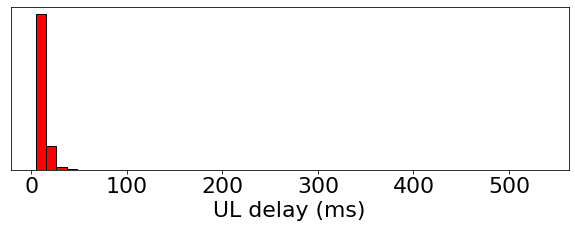

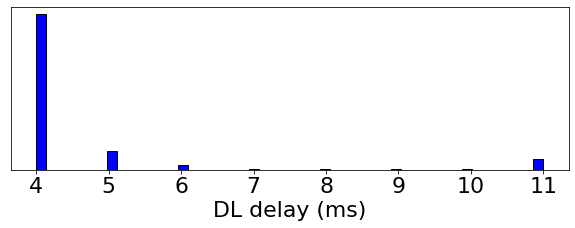

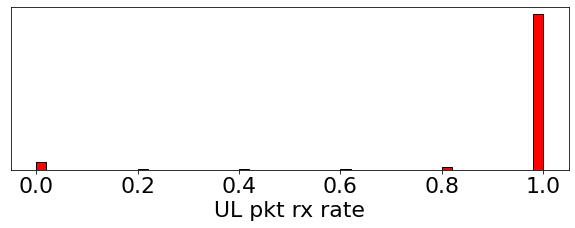

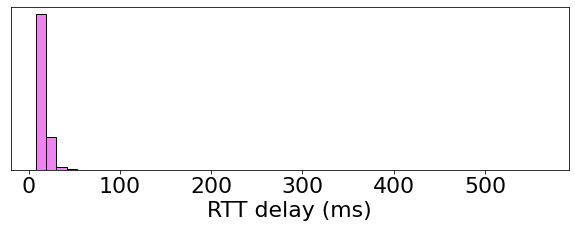

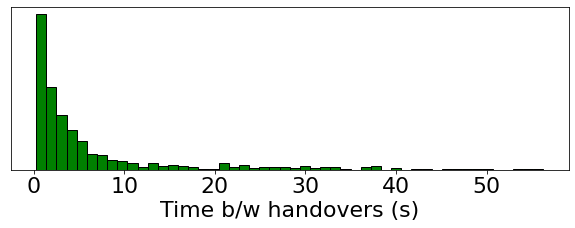

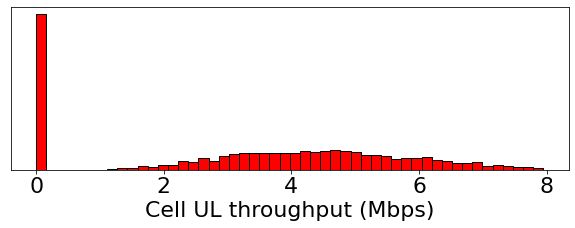

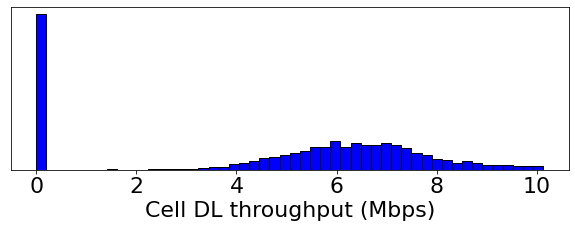

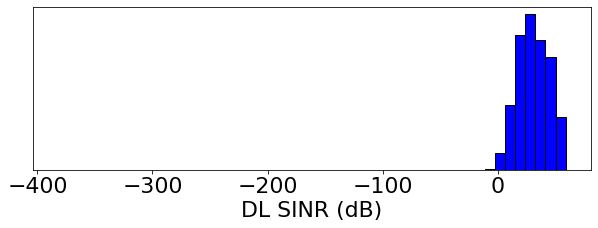

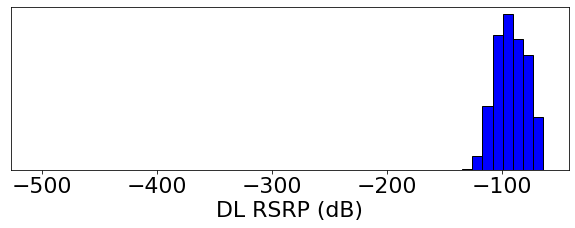

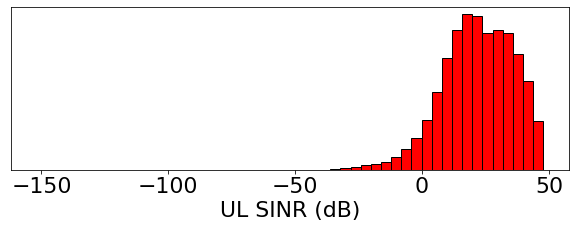

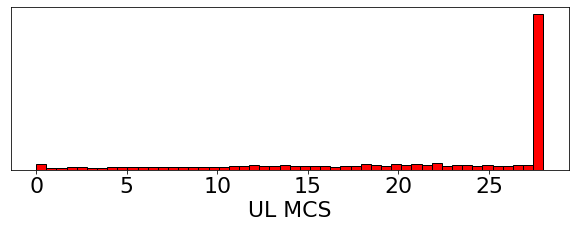

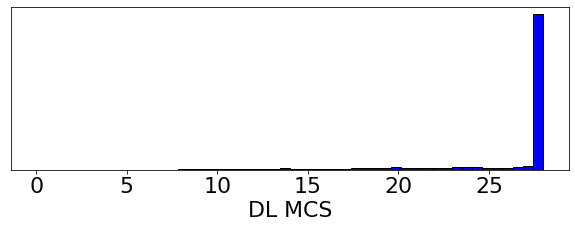

In [69]:
#=======================================
# Plot histograms   
#=======================================
# for metrics related to delay we are removing outliers using the 99th percentile value so that we can 
# get a better view of what is happenning in the data

if histogram_plots:
    if ('delay_trace.txt' in files):
        plot_histogram(ul_delays, 'red', 'UL delay (ms)', 'hist_ul_delays.png', plot_dir)
        plot_histogram(dl_delays, 'blue', 'DL delay (ms)', 'hist_dl_delays.png', plot_dir)
        plot_histogram(ul_pkt_rx, 'red', 'UL pkt rx rate', 'hist_ul_pkt_rx.png', plot_dir)
        #lot_histogram(dl_pkt_rx, 'blue', 'DL pkt rx rate', 'hist_dl_pkt_rx.png', plot_dir)
    if ('rtt_trace.txt' in files):
        plot_histogram(rtt_delays, 'violet', 'RTT delay (ms)', 'hist_rtt_delays.png', plot_dir)
    if ('ulThroughput_trace.txt' in files):
        plot_histogram(ul_thput, 'red', 'UL thput (Mbps)', 'hist_ul_thput.png', plot_dir)
    if ('dlThroughput_trace.txt' in files):
        plot_histogram(dl_thput, 'blue', 'DL thput (Mbps)', 'hist_dl_thput.png', plot_dir)
    if ('handover_trace.txt' in files):
        plot_histogram(time_bw_hos, 'green', 'Time b/w handovers (s)', 'hist_time_bw_hos.png', plot_dir)
    if ('httpClientRtt_trace.txt' in files):
        plot_histogram(page_load_time, 'green', 'Page load time for webpages (ms)', 'hist_page_load_time.png', plot_dir)
    if ('httpClientRtt_trace.txt' in files):
        plot_histogram(webpage_size, 'green', 'Webpage size (B)', 'hist_webpage_size.png', plot_dir)
    if ('dashClient_trace.txt' in files): 
        plot_histogram(segment_bitrate, 'green', 'Video segment bitrate', 'hist_segment_bitrate.png', plot_dir)
    if ('vrFragment_trace.txt' in files): 
        plot_histogram(vr_burst_time, 'green', 'VR time to send packet burst (ms)', 'hist_vr_burst_time.png', plot_dir)
    if ('UlMacStats.txt' in files):
        plot_histogram(cell_ul_thput, 'red', 'Cell UL throughput (Mbps)', 'hist_cell_ul_thput.png', plot_dir)
    if ('DlMacStats.txt' in files): 
        plot_histogram(cell_dl_thput, 'blue', 'Cell DL throughput (Mbps)', 'hist_cell_dl_thput.png', plot_dir)
    if ('DlRsrpSinrStats.txt' in files):
        plot_histogram(10*np.log10(dl_sinr), 'blue', 'DL SINR (dB)', 'hist_dl_sinr.png', plot_dir)
        plot_histogram(10*np.log10(1000*dl_rsrp), 'blue', 'DL RSRP (dB)', 'hist_dl_rsrp.png', plot_dir)
    if ('UlSinrStats.txt' in files):
        plot_histogram(10*np.log10(ul_sinr), 'red', 'UL SINR (dB)', 'hist_ul_sinr.png', plot_dir)
    if ('UlMacStats.txt' in files): 
        plot_histogram(w_ul_mcs, 'red', 'UL MCS', 'hist_ul_mcs.png', plot_dir)
    if ('DlMacStats.txt' in files): 
        plot_histogram(w_dl_mcs, 'blue', 'DL MCS', 'hist_dl_mcs.png', plot_dir)
        
      

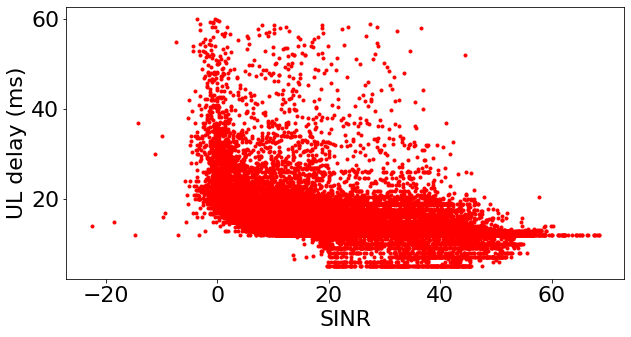

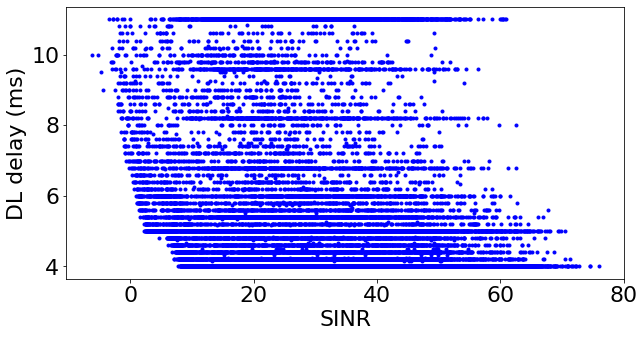

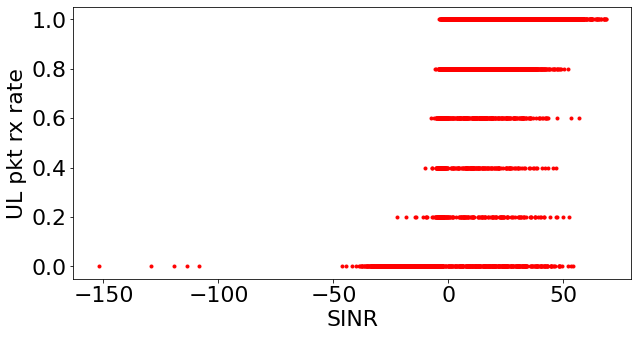

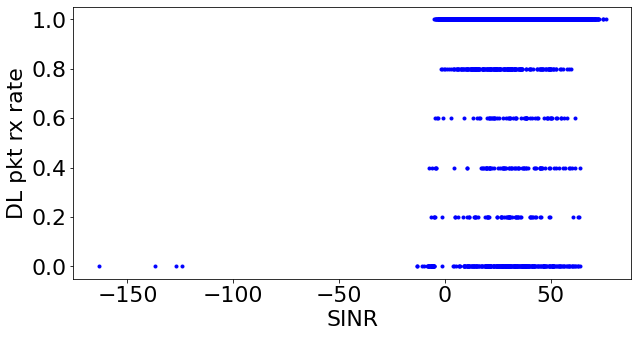

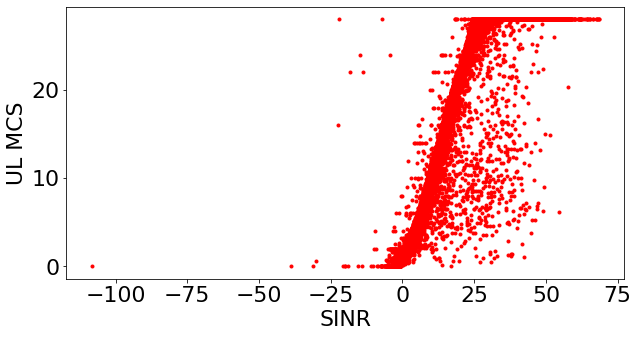

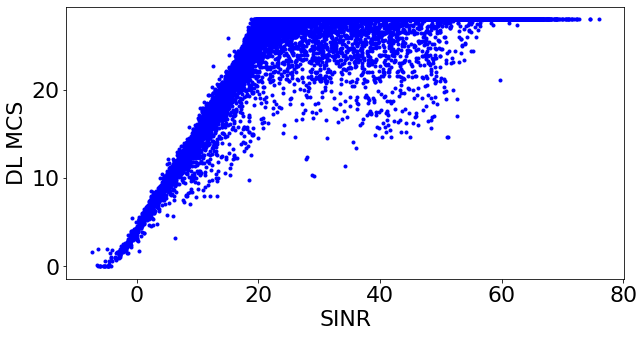

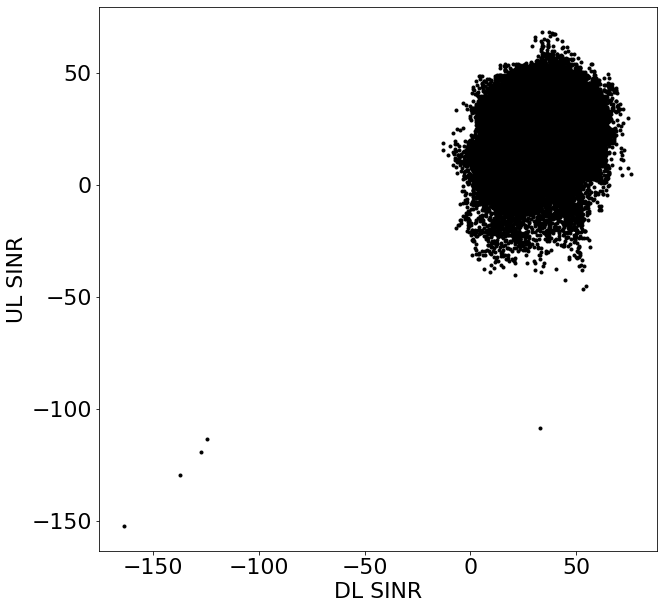

In [70]:
#=======================================
# Plot metrics vs SINR   
#======================================= 

if ('delay_trace.txt' in files):
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), w_ul_delays, 'red', 'UL delay (ms)', 'ul_sinr_vs_delay.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), w_dl_delays, 'blue', 'DL delay (ms)', 'dl_sinr_vs_delay.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), ul_pkt_rx, 'red', 'UL pkt rx rate', 'ul_sinr_vs_ul_pkt_rx.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), dl_pkt_rx, 'blue', 'DL pkt rx rate', 'dl_sinr_vs_dl_pkt_rx.png', plot_dir)
if ('UlMacStats.txt' in files) and ('DlMacStats.txt' in files):
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), w_ul_mcs, 'red', 'UL MCS', 'ul_sinr_vs_mcs.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), w_dl_mcs, 'blue', 'DL MCS', 'dl_sinr_vs_mcs.png', plot_dir)
    
    fig = plt.figure(figsize=(10,10))
    plt.plot(10*np.log10(w_dl_sinr), 10*np.log10(w_ul_sinr), '.', color='k')
    plt.xlabel('DL SINR'); plt.ylabel('UL SINR'); 
    fname=plot_dir+'ul_vs_dl_sinr.png'
    plt.savefig(fname)
    plt.show()
    


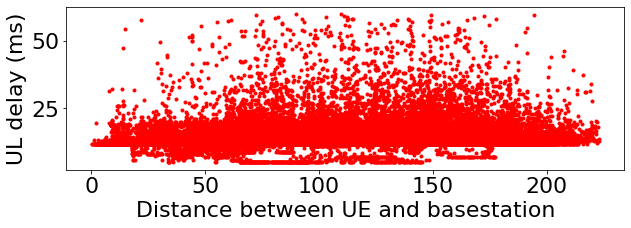

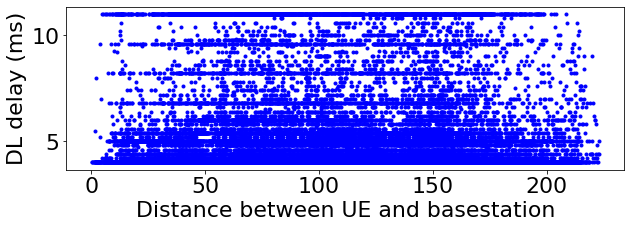

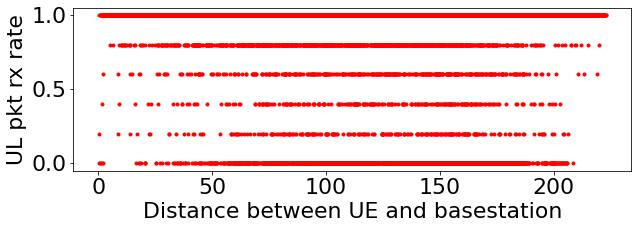

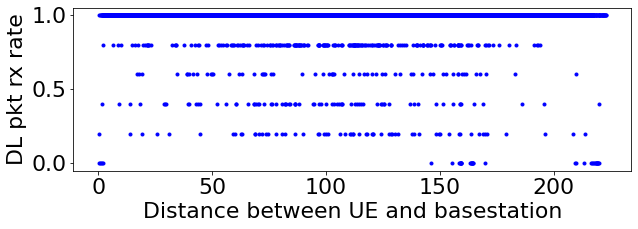

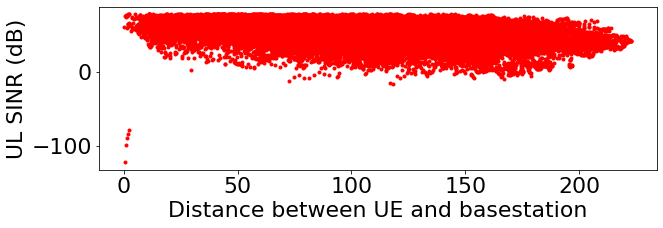

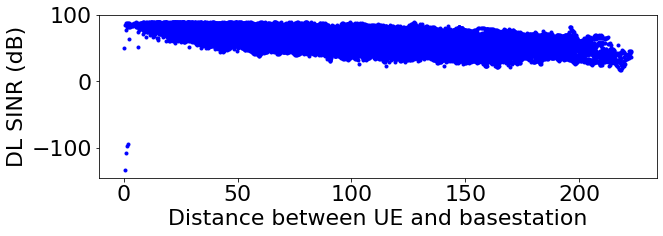

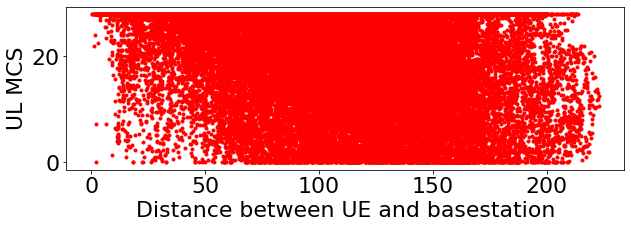

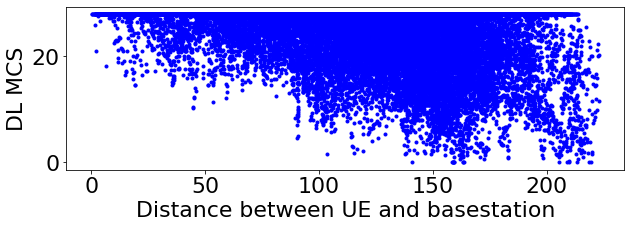

DONE


In [71]:
  
#=======================================
# Plot metrics vs UE-BS distance   
#======================================= 
if distance_plots:
    #print('Each plot with sample size: ', w_dist_to_cell.size)
    if ('delay_trace.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_ul_delays, 'red', 'UL delay (ms)', 'dist_vs_ul_delay.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_dl_delays, 'blue', 'DL delay (ms)', 'dist_vs_dl_delay.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, ul_pkt_rx, 'red', 'UL pkt rx rate', 'dist_vs_ul_pkt_rx.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, dl_pkt_rx, 'blue', 'DL pkt rx rate', 'dist_vs_dl_pkt_rx.png', plot_dir)
        
    #if ('rtt_trace.txt' in files):       
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, w_rtt_delays, 'violet', 'RTT delay (ms)', 'dist_vs_rtt_delay.png', plot_dir)
    if ('ulThroughput_trace.txt' in files):
        #for a single user since only one user measures throughput
        imsi=1  
        imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        imsi_sliced_y = ul_thput[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL throughput (Mbps)', 'dist_vs_ul_thput.png', plot_dir)
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, ul_thput, 'red', 'UL throughput (Mbps)', 'dist_vs_ul_thput.png', plot_dir)
    if ('dlThroughput_trace.txt' in files):
        #for a single user since only one user measures throughput
        imsi=1  
        imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        imsi_sliced_y = dl_thput[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        
        plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL throughput (Mbps)', 'dist_vs_dl_thput.png', plot_dir)
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, dl_thput, 'blue', 'DL throughput (Mbps)', 'dist_vs_dl_thput.png', plot_dir)
    if ('UlSinrStats.txt' in files):       
        plot_metric_vs_distance_to_cell(w_dist_to_cell, 10*np.log10(1000*w_ul_sinr), 'red', 'UL SINR (dB)', 'dist_vs_ul_sinr.png', plot_dir)
        # for a single user 
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = 10*np.log10(w_ul_sinr[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ])
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL SINR (dB)', 'dist_vs_ul_sinr.png', plot_dir)
    if ('DlRsrpSinrStats.txt' in files):  
        plot_metric_vs_distance_to_cell(w_dist_to_cell, 10*np.log10(1000*w_dl_sinr), 'blue', 'DL SINR (dB)', 'dist_vs_dl_sinr.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = 10*np.log10(w_dl_sinr[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ])
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL SINR (dB)', 'dist_vs_dl_sinr.png', plot_dir)
    if ('UlMacStats.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_ul_mcs, 'red', 'UL MCS', 'dist_vs_ul_mcs.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = w_ul_mcs[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL MCS', 'dist_vs_ul_mcs.png', plot_dir)
    if ('DlMacStats.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_dl_mcs, 'blue', 'DL MCS', 'dist_vs_dl_mcs.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = w_dl_mcs[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL MCS', 'dist_vs_dl_mcs.png', plot_dir)
        
            
print('DONE')
#wandb.finish    

In [72]:
import seaborn as sns
from matplotlib import cm, colors
from random import randint
from random import sample

ue_loc_file = 'mobility_trace.txt'
enb_loc_file = 'gnb_locations.txt'

In [74]:
# Specify here topology details from the dataset we are using
# When ISD = 500 m
area_xlim=(-170,170)
area_ylim=(-170,170)

#area_xlim=(-250,250)
#area_ylim=(-250,250)



# When ISD = 200 m 
#area_xlim=(-70,70)
#area_ylim=(-70,70)

clr_map=['r','b','g', 'gold', 'gold', 'gold']

In [75]:
# When ISD = 500 m
#area_xlim=[-650,650]
#area_ylim=[-650,650]

# Creates a list of random colours to use 
#clr_map = []
#for i in range(total_num_cells):
#    clr_map.append('#%06X' % randint(0, 0xFFFFFF))

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3


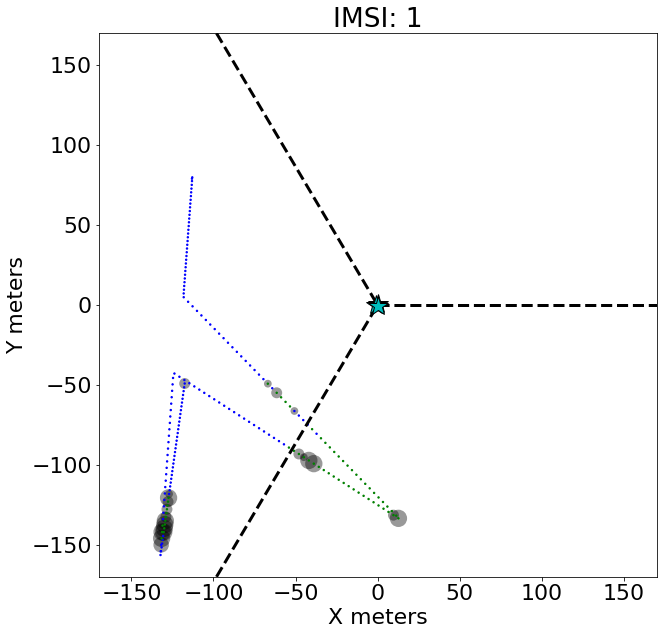

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6


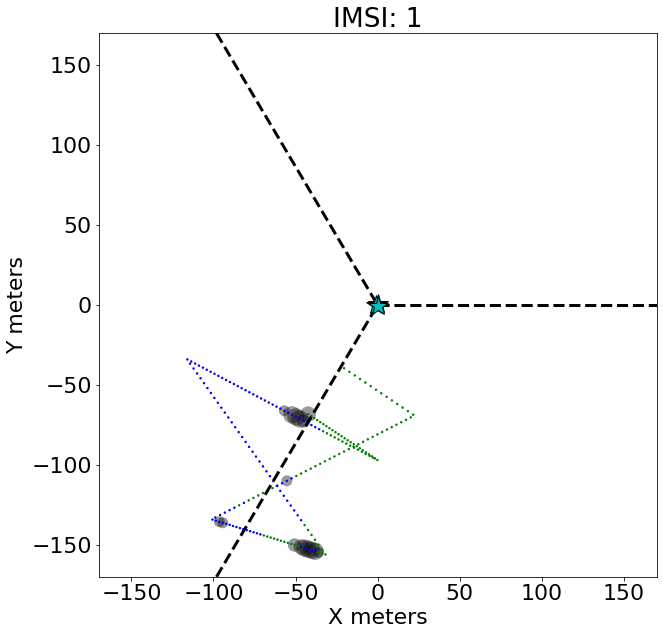

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8


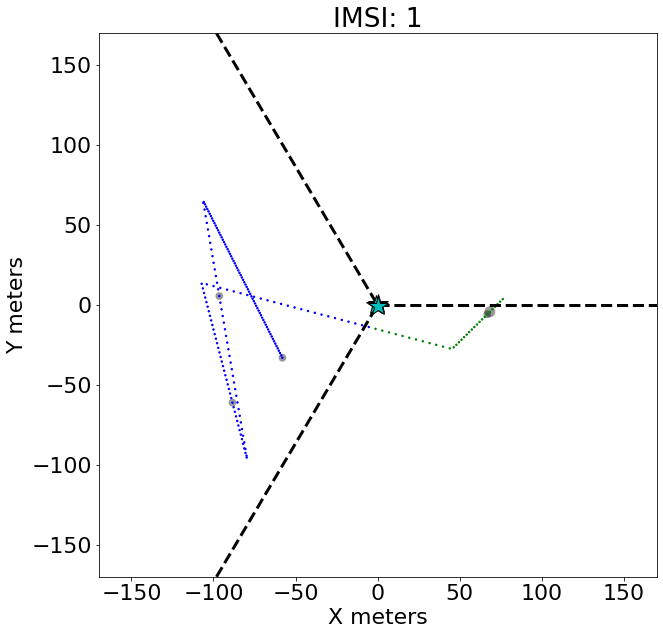

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5


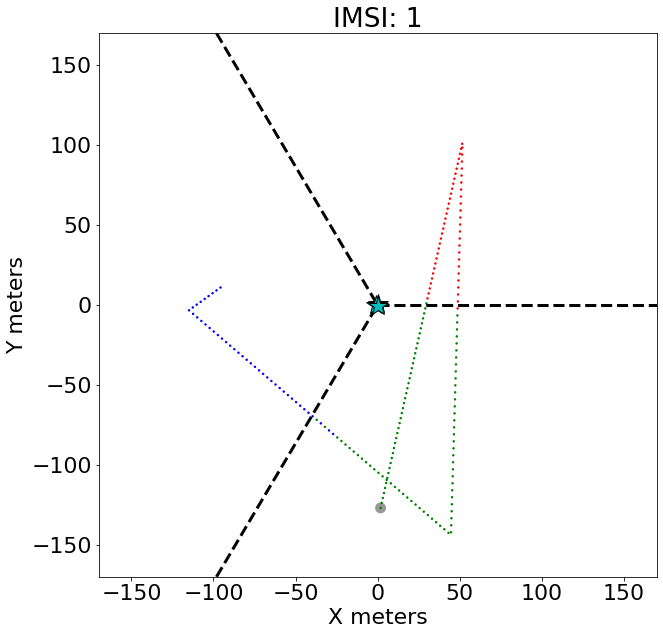

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7


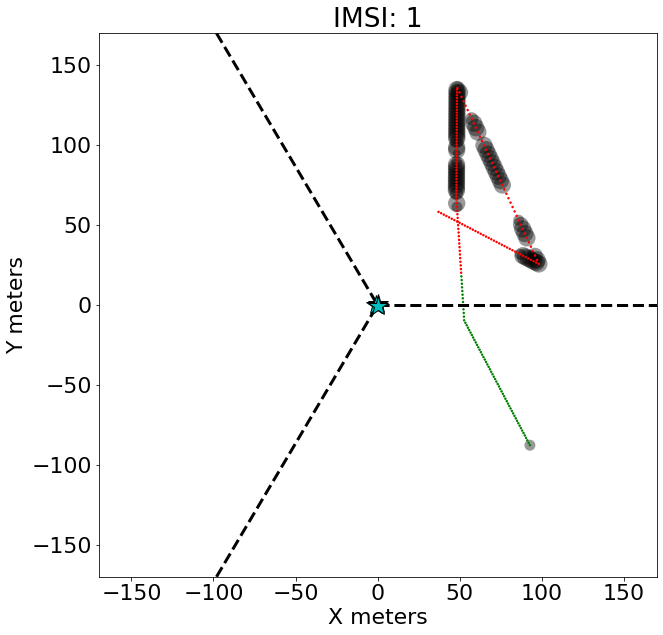

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10


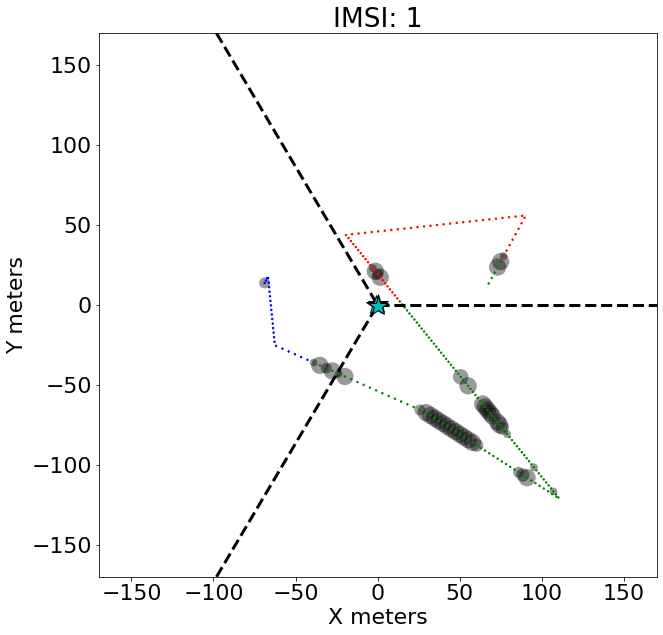

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9


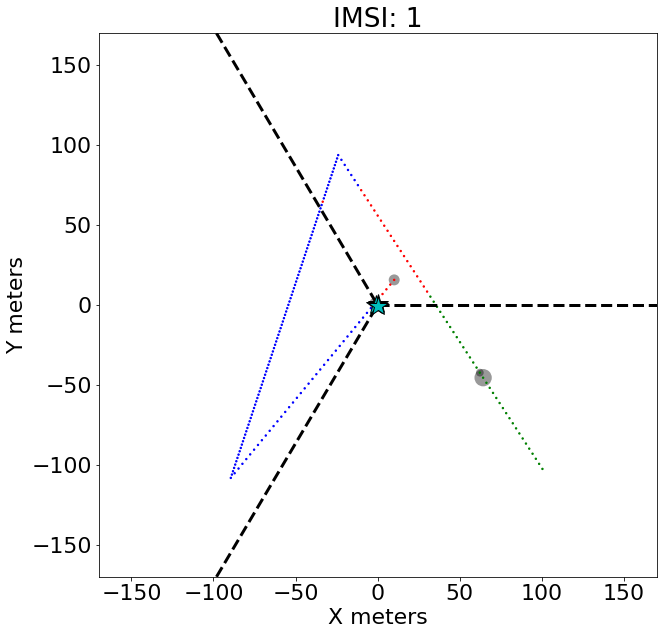

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1


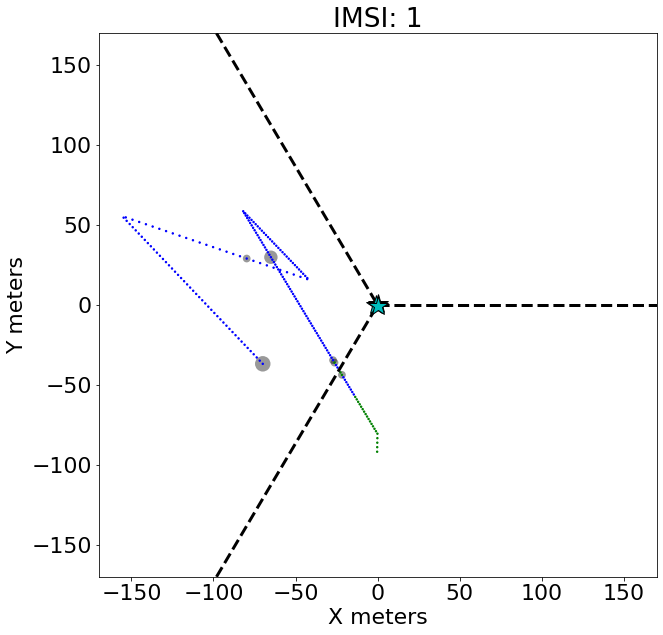

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4


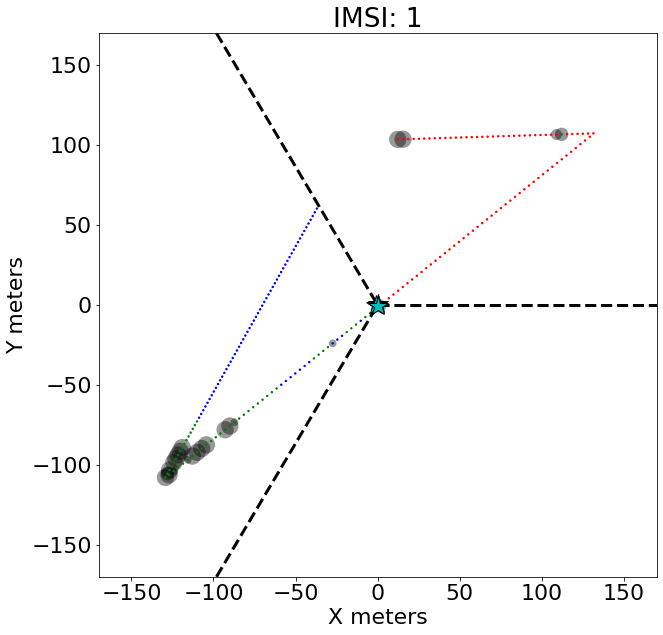

../../data_volume/lte_3macro_30Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2


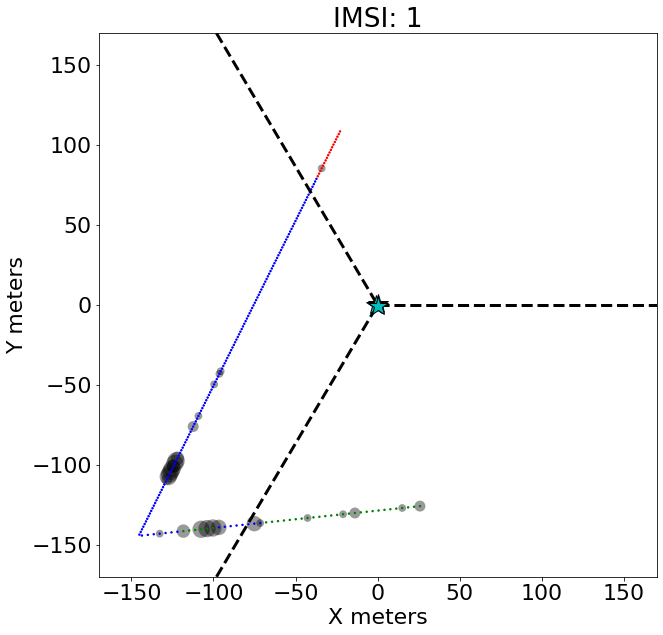

In [76]:
run_idx=0
for run in glob.glob(data_dir+'run*'):
#for run in ['run1']:
    print('============================================================')
    print (run)
    print('============================================================')    
    only_run = run.split('/')[-1]
    if only_run in skip_runs:
        continue
    bs_locs = pd.read_csv(run+'/'+enb_loc_file, sep=',')
    bs_cellIds = bs_locs['cellId']
    bs_locs = bs_locs[['gnbpos_x', 'gnbpos_y']]
    # imsis chosen for plotting 
    #chosen_imsis=sample(range(1, total_num_ues+1), 3)
    chosen_imsis=[1]
    
    
    df = pd.read_csv(data_dir+run+'/'+ue_loc_file, sep='\t')
    
    samples_per_run_per_imsi = (sim_time*1000/time_wind_val) +1
    shift = run_idx*samples_per_run_per_imsi*total_num_ues
    #print('run start sample : ', int(shift))
    #print('run last sample : ', int(shift + (total_num_ues*samples_per_run_per_imsi-1)))
    ## Separate by UE
    #for name, df_ue in df.groupby(by=['IMSI']):
    df_ue=df.groupby(by=['IMSI'])
    
    #fig = plt.figure(figsize=(10,10))
    
    for imsi in chosen_imsis:
        df_per_imsi=df_ue.get_group(imsi)
        #print(df_per_imsi['cellId'].value_counts())
        colors=[clr_map[cell-1] for cell in df_per_imsi['cellId'].to_numpy()]
        #w_ul_sinr
        #w_ul_mcs
        #ul_pkt_rx
        data = pd.DataFrame({'ue_x':w_avg_ue_xpos, 'ue_y':w_avg_ue_ypos, 'metric':(1-ul_pkt_rx).clip(min=0), 'cellId':w_mode_assoc_cell})
        imsi_sliced_data = data[ int(shift + (imsi-1)*samples_per_run_per_imsi)  : int(shift + (imsi*samples_per_run_per_imsi-1))  ]
        # The lines indicating the cell edge 
        fig = plt.figure(figsize=(10,10))
        plt.plot([0, area_xlim[1]], [0, 0], 'k', linestyle="--", linewidth=3)
        plt.plot([area_ylim[0]/math.sqrt(3), 0], [area_ylim[1], 0], 'k', linestyle="--", linewidth=3)
        plt.plot([area_ylim[0]/math.sqrt(3), 0], [area_ylim[0], 0], 'k', linestyle="--", linewidth=3)
        # plot the metric 
        sns.scatterplot(data=imsi_sliced_data, x='ue_x', y='ue_y', size='metric', legend=False, alpha=0.4, sizes=(0, 300), color='k', edgecolor='k')
        # plot the association as a colour
        plt.scatter(df_per_imsi['pos_x'], df_per_imsi['pos_y'], c=colors, s=2)
        plt.title('IMSI: '+str(imsi))
        #plt.title('Run: ', )
        plt.xlim(area_xlim)
        plt.ylim(area_ylim)
        plt.xlabel('X meters')
        plt.ylabel('Y meters')
        ## plot base station locations 
        plt.plot(bs_locs['gnbpos_x'], bs_locs['gnbpos_y'], 'c*', markersize=20, markeredgecolor='k')
        plt.show()
    run_idx=run_idx+1
    

In [78]:
import os
os.system('cp parse_visualize_data.ipynb '+'./saved_notebooks/'+data_dir.split('/')[-2]+'.ipynb')

0